# Heart disease analysis Using different model

In the dataset we have some patient clinical report, We have to predict they have heart disease or not?

# Load the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Description

 **1. age**: The person's age in years

 **2. sex**: The person's sex (1 = male, 0 = female)

 **3. cp**: Chest pain type 
            * 0: Typical angina: chest pain related decrease blood supply to the heart
            * 1: Atypical angina: chest pain not related to heart
            * 2: Non-anginal pain: typically esophageal spasms (non heart related)
            * 3: Asymptomatic: chest pain not showing signs of disease
            
**4. trestbps**: resting blood pressure (in mm Hg on admission to the hospital)

**5. chol**: The person's cholesterol measurement in mg/dl

**6. fbs**: the perdon's fasting blood sugar > 120 mg/dl. (1 = true; 0 = false)

**7. restecg**: Resting electrocardiographic results

     0: Nothing to note
     1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
     2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
        
**8. thalach**: Maximum heart rate achieved

**9. exang**: Exercise induced angina (1 = yes; 0 = no)

**10. oldpeak**: - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

**11. slope**: - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
    
**12. ca**: Number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
    
**13. thal**: Thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
    
**14. target**: Person have disease or not (1=yes, 0=no) (= the predicted attribute)

In [4]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [5]:
df.shape

(303, 14)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Dataset problems

Thanks to the post of InitPic we noted that this dataset is a bit different from the original one while the description is the same.

Part of these differences is that there were a few null values in the original dataset that have taken some values here:

A few more things to consider:

In this Dataset data #93, 159, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs (so they should be removed)

also data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.

Because these are just a few instances, I decided to drop them.

In [7]:
df[df.ca == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.00,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.40,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.00,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.00,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.10,1,4,3,0


In this Dataset data #93, 159, 164, 165 and 252 have ca=4 which is incorrect.

In [8]:
df[df.thal == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.00,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.00,1,0,0,0


also data #49 and 282 have thal = 0, also incorrect.

In [9]:
df.duplicated(subset=None, keep="first").sum()

1

And also a duplicate row, It also should be removed. 

### Date Cleaning

In [10]:
#df.drop_duplicates(subset =None, keep = 'first', inplace = True)  

In [11]:
#df = df[df.ca != 4]

In [12]:
#df = df[df.thal != 0]

In [13]:
#replace false value with most appropriate value
df['ca'] = df['ca'].replace([4],3)

In [14]:
df[df.ca == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [15]:
#replace false value with most appropriate value
df['thal'] = df['thal'].replace([0],7) 

In [16]:
df[df.thal == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [17]:
df.shape

(303, 14)

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.71,2.36,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,0.98,0.69,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,3.00,7.00,1.00


# Data Profiling

In [19]:
import pandas_profiling

In [20]:
profile = pandas_profiling.ProfileReport(df)
profile

# Feature Selection

### Univariate selection

Univariate feature selection examines each feature individually to determine the strength of the relationship of the feature with the response variable.

In [21]:
#X= df.drop(['target'], axis=1)
#y= df['target']
x = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [23]:
BestFeature = SelectKBest(score_func=f_classif, k=10)
fit = BestFeature.fit(x,y)

In [24]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [25]:
featureScores= pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Column','Score']

In [26]:
featureScores

,Column,Score
0,age,16.12
1,sex,25.79
2,cp,69.77
3,trestbps,6.46
4,chol,2.20
5,fbs,0.24
6,restecg,5.78
7,thalach,65.12
8,exang,70.95
9,oldpeak,68.55


In [27]:
print(featureScores.nlargest(13,'Score'))

      Column  Score
8      exang  70.95
2         cp  69.77
9    oldpeak  68.55
7    thalach  65.12
11        ca  64.05
10     slope  40.90
12      thal  31.80
1        sex  25.79
0        age  16.12
3   trestbps   6.46
6    restecg   5.78
4       chol   2.20
5        fbs   0.24


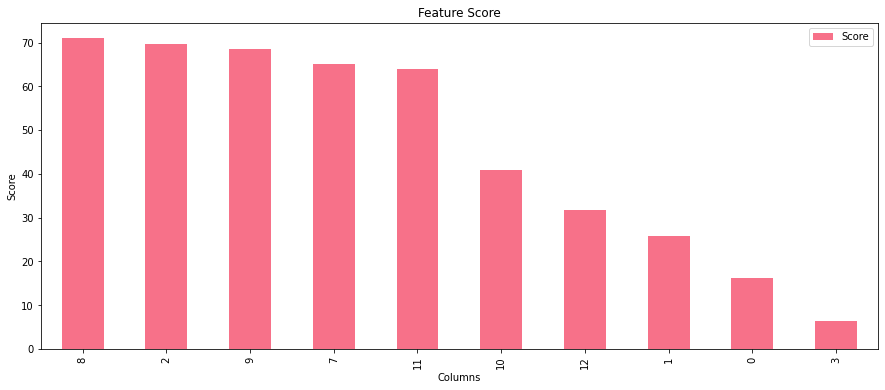

In [28]:
featureScores.nlargest(10,'Score').plot(kind='bar',figsize=(15,6),color=sns.color_palette("husl"))
plt.xlabel('Columns')
plt.ylabel('Score')
plt.title('Feature Score')
plt.show()

### chi2 Method

In [29]:
from sklearn.feature_selection import chi2

In [30]:
BestFeature = SelectKBest(score_func=chi2, k=13)
fit = BestFeature.fit(x,y)

In [31]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [32]:
featureScores= pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Column','Score']

In [33]:
featureScores

,Column,Score
0,age,23.29
1,sex,7.58
2,cp,62.60
3,trestbps,14.82
4,chol,23.94
5,fbs,0.20
6,restecg,2.98
7,thalach,188.32
8,exang,38.91
9,oldpeak,72.64


In [34]:
print(featureScores.nlargest(13,'Score'))

      Column  Score
7    thalach 188.32
9    oldpeak  72.64
11        ca  70.89
2         cp  62.60
8      exang  38.91
4       chol  23.94
0        age  23.29
3   trestbps  14.82
10     slope   9.80
1        sex   7.58
12      thal   5.90
6    restecg   2.98
5        fbs   0.20


### mutual_info_classif method

In [35]:
from sklearn.feature_selection import mutual_info_classif

In [36]:
BestFeature = SelectKBest(score_func=mutual_info_classif, k=13)
fit = BestFeature.fit(x,y)

In [37]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [38]:
featureScores= pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Column','Score']

In [39]:
featureScores

,Column,Score
0,age,0.02
1,sex,0.04
2,cp,0.15
3,trestbps,0.00
4,chol,0.05
5,fbs,0.00
6,restecg,0.00
7,thalach,0.08
8,exang,0.10
9,oldpeak,0.12


In [40]:
print(featureScores.nlargest(13,'Score'))

      Column  Score
2         cp   0.15
11        ca   0.12
9    oldpeak   0.12
12      thal   0.12
8      exang   0.10
10     slope   0.10
7    thalach   0.08
4       chol   0.05
1        sex   0.04
0        age   0.02
3   trestbps   0.00
5        fbs   0.00
6    restecg   0.00


### Recursive Feature Elimination
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [41]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

In [42]:
# model = LogisticRegression(solver='lbfgs')
# rfe = RFE(model, 3)
# fit = rfe.fit(x, y)
# print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
# print("Feature Ranking: %s" % (fit.ranking_))

Here top 3 freature is 'cp', 'oldpeak' and 'ca' 

#  Using all feature

### Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [43]:
# # decision tree for feature importance on a regression problem
# from sklearn.datasets import make_regression
# from sklearn.tree import DecisionTreeRegressor
# from matplotlib import pyplot
# # define dataset
# X, y = make_regression(n_samples=303, n_features=13, n_informative=13, random_state=12)
# # define the model
# model = DecisionTreeRegressor()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

# Scalling The Data
Normalize the data into 0 and 1


### Standard Scalar

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'] 
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.95,0.68,1.97,0.76,-0.26,2.39,-1.01,0.02,-0.70,1.09,-2.27,-0.73,-1.96,1
1,-1.92,0.68,1.00,-0.09,0.07,-0.42,0.90,1.63,-0.70,2.12,-2.27,-0.73,-0.52,1
2,-1.47,-1.47,0.03,-0.09,-0.82,-0.42,-1.01,0.98,-0.70,0.31,0.98,-0.73,-0.52,1
3,0.18,0.68,0.03,-0.66,-0.20,-0.42,0.90,1.24,-0.70,-0.21,0.98,-0.73,-0.52,1
4,0.29,-1.47,-0.94,-0.66,2.08,-0.42,0.90,0.58,1.44,-0.38,0.98,-0.73,-0.52,1


### Min Max scallar

In [46]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

#columns_to_scale = ['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal','trestbps','chol','fbs','restecg']
#df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [47]:
# df.head()

In [48]:
X= df.drop(['target'], axis=1) #,'trestbps','chol','fbs','restecg'
y= df['target']

In [49]:
#devide Dataset into test and train
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [50]:
#check those dataset
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2756
X_test- 1183
y_train- 212
y_test- 91


# Logistic regration

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=999, C =  1, tol = 5)
model1 = lr.fit(X_train,y_train)
prediction1 = model1.predict(X_test)

y_pred_quant1 = model1.predict_proba(X_test)[:, 1]

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 2, 49]], dtype=int64)

Details of confusion matricx
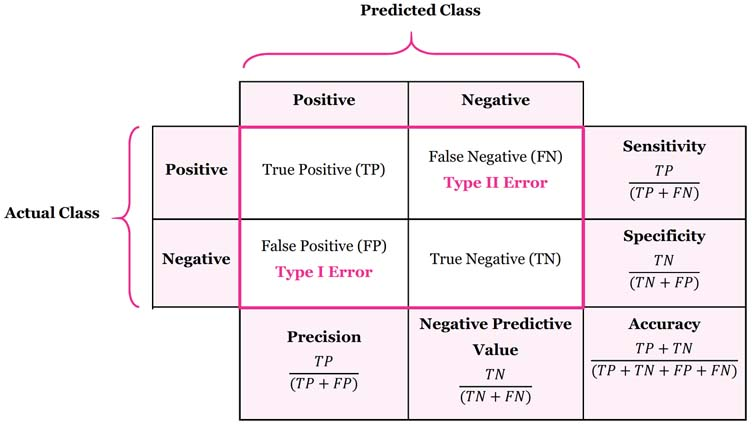

<AxesSubplot:>

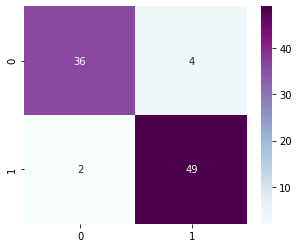

In [53]:
plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="BuPu")


In [54]:
#Accuricy using matrics
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9340659340659341


In [55]:
from sklearn.metrics import accuracy_score

accuracies = {}

acc = accuracy_score(y_test,prediction1)*100
accuracies['Logistic Regration'] = acc
acc

93.4065934065934

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        40
           1       0.92      0.96      0.94        51

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91



# Dicision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=999)
model2 = dtc.fit(X_train,y_train)
prediction2 = model2.predict(X_test)

y_pred_quant2 = model2.predict_proba(X_test)[:, 1]

# probs = model.predict_proba(X_test)
# probs = probs[:, 1]
# loss = log_loss(testy, probs)
# loss

In [58]:
cm2 = confusion_matrix(y_test,prediction2)
cm2

array([[34,  6],
       [14, 37]], dtype=int64)

In [59]:
acc = accuracy_score(y_test,prediction2)*100
accuracies['Dicision Tree'] = acc
acc

78.02197802197803

In [60]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        40
           1       0.86      0.73      0.79        51

    accuracy                           0.78        91
   macro avg       0.78      0.79      0.78        91
weighted avg       0.79      0.78      0.78        91



# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=300)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)

y_pred_quant3 = model3.predict_proba(X_test)[:, 1]

cm3 = confusion_matrix(y_test, prediction3)
cm3

array([[34,  6],
       [ 4, 47]], dtype=int64)

In [62]:
acc = accuracy_score(y_test, prediction3)*100
accuracies['Random Forest'] = acc
acc

89.01098901098901

In [63]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.89      0.92      0.90        51

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



# Support Vector machine

In [64]:
from sklearn.svm import SVC

svm=SVC(probability=True, C = 0.1)
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)

y_pred_quant4 = model4.predict_proba(X_test)[:, 1]

cm4= confusion_matrix(y_test,prediction4)
cm4

array([[33,  7],
       [ 2, 49]], dtype=int64)

In [65]:
acc = accuracy_score(y_test, prediction4)*100
accuracies['Support Vector Machine'] = acc
acc

90.10989010989012

In [66]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        40
           1       0.88      0.96      0.92        51

    accuracy                           0.90        91
   macro avg       0.91      0.89      0.90        91
weighted avg       0.90      0.90      0.90        91



# Gaussion NB

In [67]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)

y_pred_quant5 = model5.predict_proba(X_test)[:, 1]

cm5= confusion_matrix(y_test, prediction5)
cm5

array([[35,  5],
       [ 5, 46]], dtype=int64)

In [68]:
acc = accuracy_score(y_test, prediction5)*100
accuracies['Gaussion NB'] = acc
acc

89.01098901098901

In [69]:
print(classification_report(y_test, prediction5))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        40
           1       0.90      0.90      0.90        51

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



# K nearest neighbor

In [70]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 7)
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)

y_pred_quant6 = model6.predict_proba(X_test)[:, 1]

cm6= confusion_matrix(y_test, prediction6)
cm6

array([[33,  7],
       [ 3, 48]], dtype=int64)

In [71]:
acc = accuracy_score(y_test, prediction6)*100
accuracies['K nearest neighbor'] = acc
acc

89.01098901098901

In [72]:
print(classification_report(y_test, prediction6))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.87      0.94      0.91        51

    accuracy                           0.89        91
   macro avg       0.89      0.88      0.89        91
weighted avg       0.89      0.89      0.89        91



# Comparing Model

In [73]:
print('Logistic Regration - lr :', accuracy_score(y_test, prediction1) * 100)
print('Dicission Tree - dtc :', accuracy_score(y_test, prediction2) * 100)
print('Random Forrest - rfc :', accuracy_score(y_test, prediction3) * 100)
print('Support vector Machine - svm: ', accuracy_score(y_test, prediction4) * 100)
print('Gaussion NB - NB :', accuracy_score(y_test, prediction5) * 100)
print('K Nearest - KNN :', accuracy_score(y_test, prediction6) * 100)

Logistic Regration - lr : 93.4065934065934
Dicission Tree - dtc : 78.02197802197803
Random Forrest - rfc : 89.01098901098901
Support vector Machine - svm:  90.10989010989012
Gaussion NB - NB : 89.01098901098901
K Nearest - KNN : 89.01098901098901


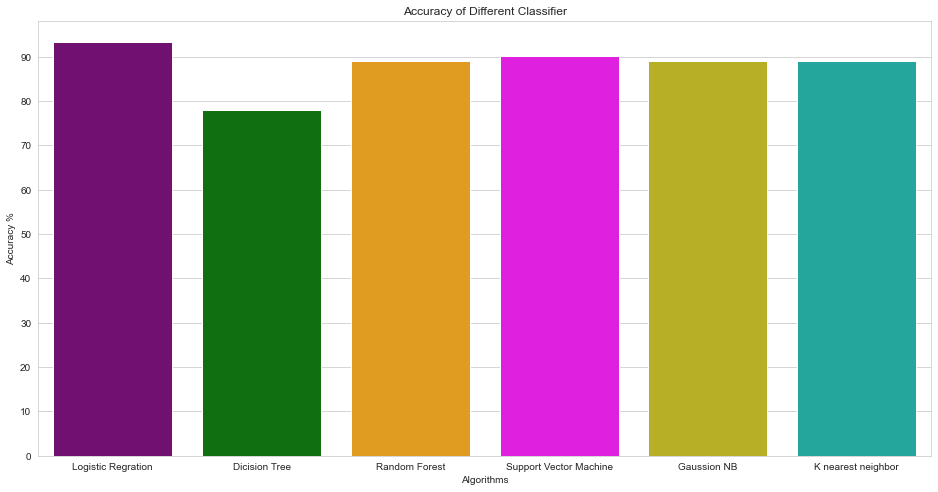

In [74]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.title("Accuracy of Different Classifier")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

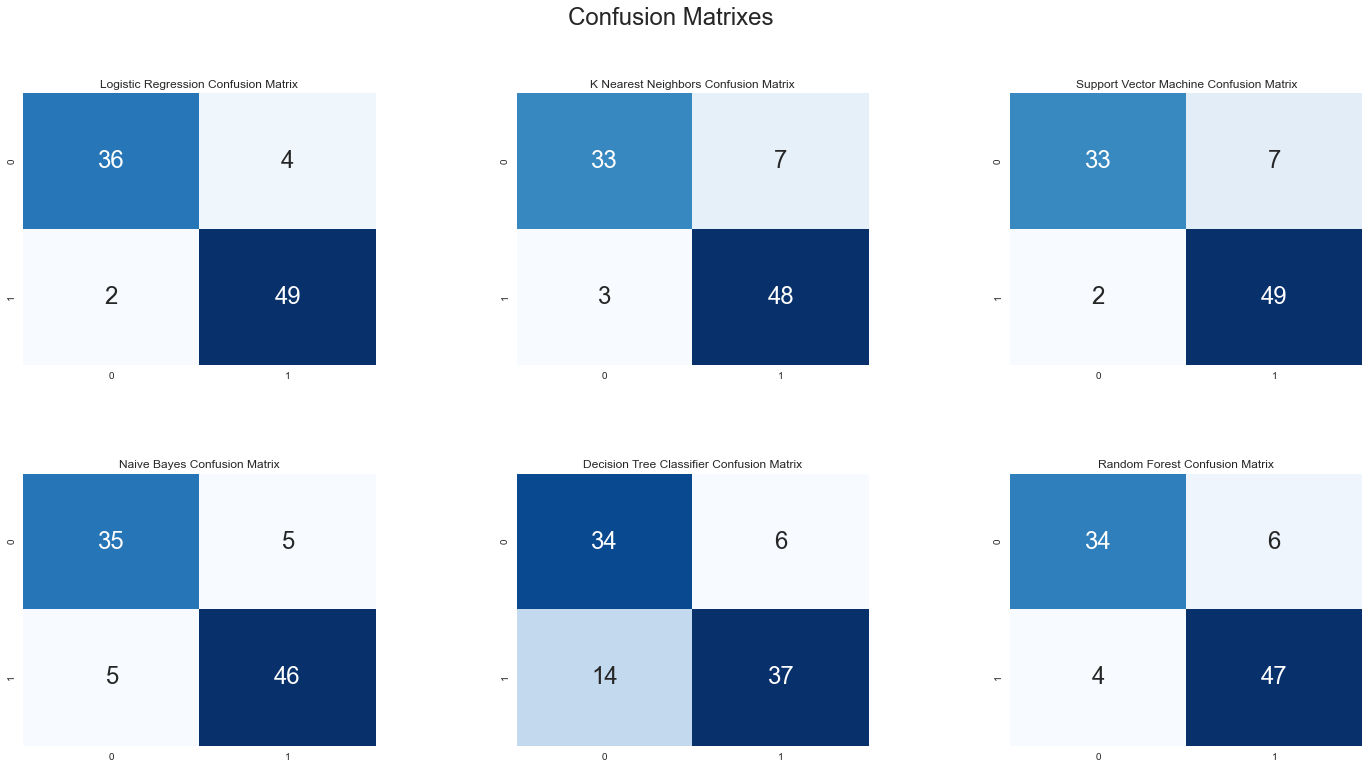

In [75]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm3,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm4,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm5,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm6,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})



plt.show()

Diagnostic tests are often sold, marketed, cited and used with sensitivity and specificity as the headline metrics. Sensitivity and specificity are defined as

Sensitivity = TruePositives / True Positives + False Negatives 

Specificity = TrueNegatives / True Negatives + False Positives

# Sensitivity

In [76]:
sensitivitys = {}

sensitivity = (cm[0,0]/(cm[0,0]+cm[1,0]))*100
print('Sensitivity of Logistic Regression : ', sensitivity )
sensitivitys['Logistic Regration'] = sensitivity

sensitivity = (cm2[0,0]/(cm2[0,0]+cm2[1,0]))*100
print('Sensitivity of Decision Tree Classifier : ', sensitivity )
sensitivitys['Decision Tree Classifier'] = sensitivity

sensitivity = (cm3[0,0]/(cm3[0,0]+cm3[1,0]))*100
print('Sensitivity of Random Forest : ', sensitivity )
sensitivitys['Random Forest'] = sensitivity

sensitivity = (cm4[0,0]/(cm4[0,0]+cm4[1,0]))*100
print('Sensitivity of Support Vector Machine: ', sensitivity )
sensitivitys['Support Vector Machine'] = sensitivity

sensitivity = (cm5[0,0]/(cm5[0,0]+cm5[1,0]))*100
print('Sensitivity of Naive Bayes : ', sensitivity )
sensitivitys['Naive Bayes'] = sensitivity

sensitivity = (cm6[0,0]/(cm6[0,0]+cm6[1,0]))*100
print('Sensitivity of K Nearest Neighbors : ', sensitivity )
sensitivitys['K Nearest Neighbors'] = sensitivity

Sensitivity of Logistic Regression :  94.73684210526315
Sensitivity of Decision Tree Classifier :  70.83333333333334
Sensitivity of Random Forest :  89.47368421052632
Sensitivity of Support Vector Machine:  94.28571428571428
Sensitivity of Naive Bayes :  87.5
Sensitivity of K Nearest Neighbors :  91.66666666666666


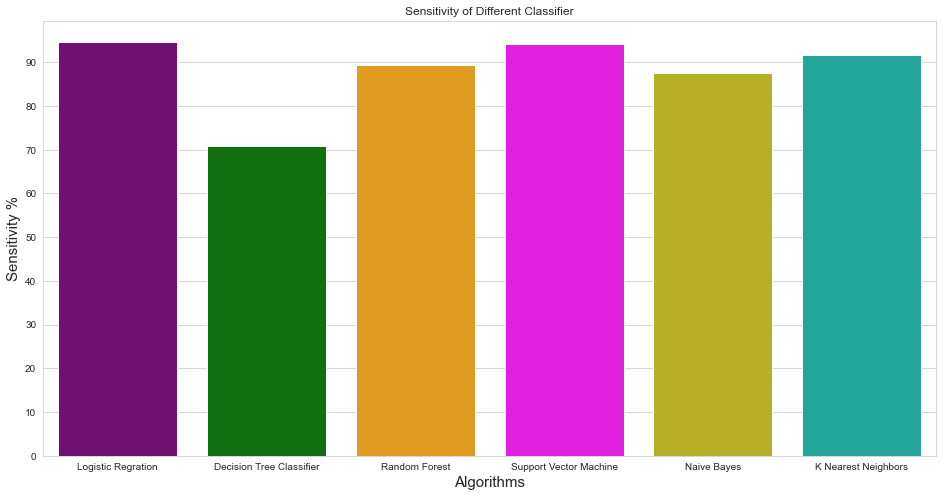

In [77]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Sensitivity %", fontsize = 15)
plt.xlabel("Algorithms", fontsize = 15)
plt.title("Sensitivity of Different Classifier")
sns.barplot(x=list(sensitivitys.keys()), y=list(sensitivitys.values()), palette=colors)

plt.show()

# Specificity

In [78]:
specificitys = {}

specificity = (cm[1,1]/(cm[1,1]+cm[0,1]))*100
print('Specificity of Logistic Regression : ', specificity)
specificitys['Logistic Regression'] = specificity

specificity = (cm2[1,1]/(cm2[1,1]+cm2[0,1]))*100
print('specificity of Decision Tree Classifier : ', specificity )
specificitys['Decision Tree'] = specificity

specificity = (cm3[1,1]/(cm3[1,1]+cm3[0,1]))*100
print('specificity of Random Forest : ', specificity )
specificitys['Random Forest'] = specificity

specificity = (cm4[1,1]/(cm4[1,1]+cm4[0,1]))*100
print('specificity of Support Vector Machine: ', specificity )
specificitys['Support Vector Machine'] = specificity

specificity = (cm5[1,1]/(cm5[1,1]+cm5[0,1]))*100
print('specificity of Naive Bayes : ', specificity )
specificitys['Naive Bayes'] = specificity

specificity = (cm6[1,1]/(cm6[1,1]+cm6[0,1]))*100
print('specificity of K Nearest Neighbors : ', specificity )
specificitys['K Nearest Neighbors'] = specificity

Specificity of Logistic Regression :  92.45283018867924
specificity of Decision Tree Classifier :  86.04651162790698
specificity of Random Forest :  88.67924528301887
specificity of Support Vector Machine:  87.5
specificity of Naive Bayes :  90.19607843137256
specificity of K Nearest Neighbors :  87.27272727272727


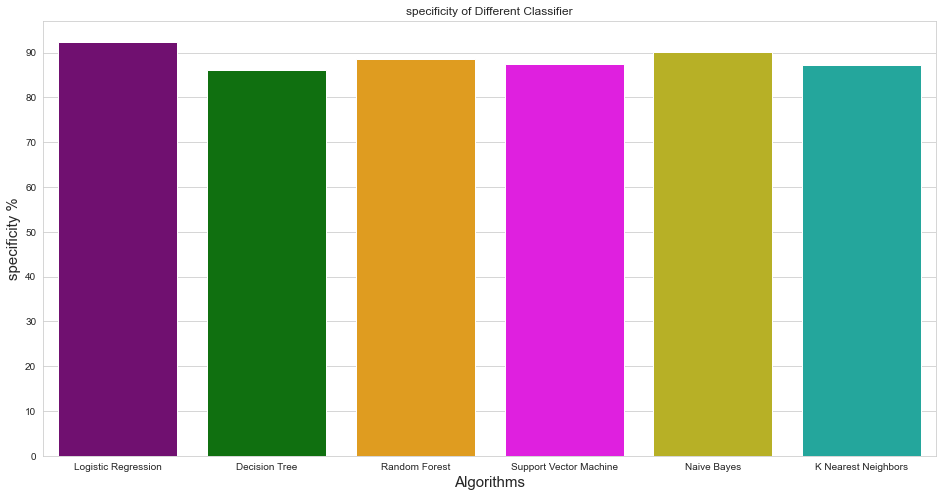

In [79]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("specificity %", fontsize = 15)
plt.xlabel("Algorithms", fontsize = 15)
plt.title("specificity of Different Classifier")
sns.barplot(x=list(specificitys.keys()), y=list(specificitys.values()), palette=colors)
plt.show()

# ROC curve

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

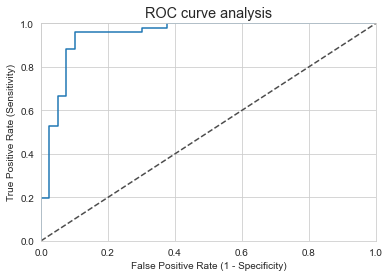

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant1)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve analysis')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

 - 0.90 - 1.00 = excellent
 - 0.80 - 0.90 = good
 - 0.70 - 0.80 = fair
 - 0.60 - 0.70 = poor
 - 0.50 - 0.60 = fail

AUC of LogisticRegression()  is :  94.55882352941177
AUC of DecisionTreeClassifier()  is :  79.75490196078432
AUC of RandomForestClassifier()  is :  94.60784313725489
AUC of SVC(probability=True)  is :  93.77450980392157
AUC of GaussianNB()  is :  95.04901960784314
AUC of KNeighborsClassifier()  is :  91.88725490196077


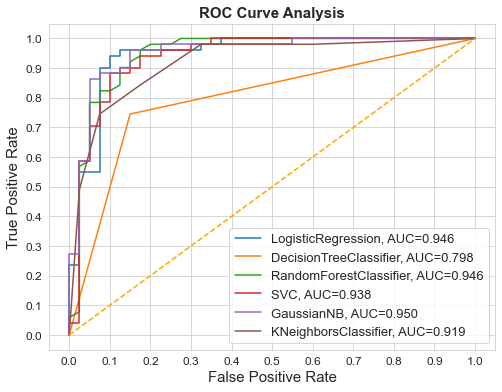

In [82]:
ROC_Curve = {}

# Instantiate the classifiers and make a list
classifiers = [LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               SVC(probability=True),
               GaussianNB(),
               KNeighborsClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::, 1]

    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    print("AUC of", cls ," is : ", auc * 100)
    ROC_Curve[cls] = auc * 100
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'fpr': fpr,
                                        'tpr': tpr,
                                        'auc': auc}, ignore_index=True)
    

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

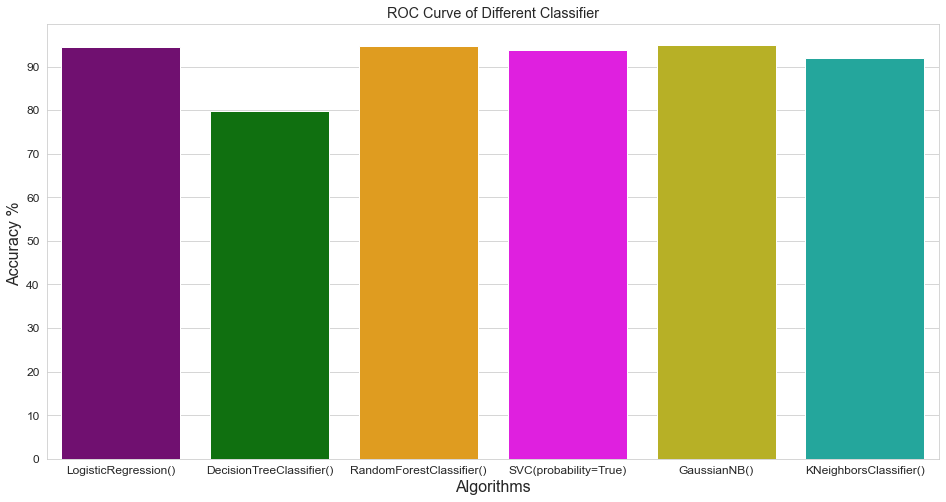

In [83]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy % ", fontsize = 16)
plt.xlabel("Algorithms", fontsize = 16)
plt.title("ROC Curve of Different Classifier")
sns.barplot(x=list(ROC_Curve.keys()), y=list(ROC_Curve.values()), palette=colors)

plt.show()

# Log loss

Log loss, also called “logistic loss,” “logarithmic loss,” or “cross entropy” can be used as a measure for evaluating predicted probabilities.

Each predicted probability is compared to the actual class output value (0 or 1) and a score is calculated that penalizes the probability based on the distance from the expected value. The penalty is logarithmic, offering a small score for small differences (0.1 or 0.2) and enormous score for a large difference (0.9 or 1.0).

A model with perfect skill has a log loss score of 0.0.

In order to summarize the skill of a model using log loss, the log loss is calculated for each predicted probability, and the average loss is reported.

In [84]:
from sklearn.metrics import log_loss

logLoss = {}

loss = log_loss(y_test, y_pred_quant1)
print('Loss of Logistic Regression : ', loss)
logLoss['Logistic Regression'] = loss

loss = log_loss(y_test, y_pred_quant2)
print('Loss of Decision Tree Classifier : ', loss )
logLoss['Decision Tree'] = loss

loss = log_loss(y_test, y_pred_quant3)
print('Loss of Random Forest : ', loss )
logLoss['Random Forest'] = loss

loss = log_loss(y_test, y_pred_quant4)
print('Loss of Support Vector Machine: ', loss )
logLoss['Support Vector Machine'] = loss

loss = log_loss(y_test, y_pred_quant5)
print('Loss of Naive Bayes : ', loss )
logLoss['Naive Bayes'] = loss

loss = log_loss(y_test, y_pred_quant6)
print('Loss of K Nearest Neighbors : ', loss )
logLoss['K Nearest Neighbors'] = loss

Loss of Logistic Regression :  0.2905115321699619
Loss of Decision Tree Classifier :  7.59099258772302
Loss of Random Forest :  0.36899795446138545
Loss of Support Vector Machine:  0.330104961846728
Loss of Naive Bayes :  0.30836650606511473
Loss of K Nearest Neighbors :  0.6519757002238565


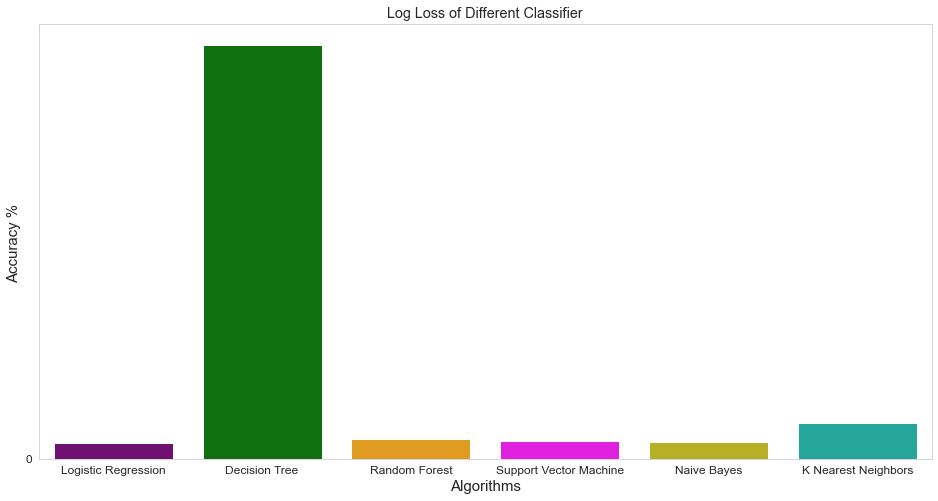

In [85]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy % ", fontsize = 15)
plt.xlabel("Algorithms", fontsize = 15)
plt.title("Log Loss of Different Classifier")
sns.barplot(x=list(logLoss.keys()), y=list(logLoss.values()), palette=colors)
plt.show()

# Kappa Statistics

Cohen’s kappa: a statistic that measures inter-annotator agreement.

This function computes Cohen’s kappa [1], a score that expresses the level of agreement between two annotators on a classification problem. It is defined as

where  is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio), and  is the expected agreement when both annotators assign labels randomly.  is estimated using a per-annotator empirical prior over the class labels [2].

Classification metrics can't handle a mix of binary and continuous targets -- 

Means it only works in regrassion in classification it is worthless

In [86]:
from sklearn.metrics import cohen_kappa_score

In [87]:
#cohen_score = cohen_kappa_score(y_test, y_pred_quant6,  labels=None, weights=None)
#cohen_score